### This is Example 4.3. Gambler’s Problem from Sutton's book.

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. 
If the coin comes up heads, he wins as many dollars as he has staked on that flip; 
if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of $100, 
or loses by running out of money. 

On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. 
This problem can be formulated as an undiscounted, episodic, finite MDP. 

The state is the gambler’s capital, s ∈ {1, 2, . . . , 99}.
The actions are stakes, a ∈ {0, 1, . . . , min(s, 100 − s)}. 
The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.

The state-value function then gives the probability of winning from each state. A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let p_h denote the probability of the coin coming up heads. If p_h is known, then the entire problem is known and it can be solved, for instance, by value iteration.


In [29]:
import numpy as np
import sys
import matplotlib.pyplot as plt
if "../" not in sys.path:
  sys.path.append("../") 


### Exercise 4.9 (programming)

Implement value iteration for the gambler’s problem and solve it for p_h = 0.25 and p_h = 0.55.



In [30]:
def value_iteration_for_gamblers(p_h, theta=0.0001, discount_factor=1.0):
    """
    Args:
        p_h: Probability of the coin coming up heads
    
    Methodology:
    - We are going to start from the final reward of the MDP then work our way backwards by iterating 
    upon the Bellman optimality equation to find the value function
    - We can then use greedy policy optimization based on our value function to come up with the optimal policy.
    - During each iteration we are also going to use synchronous backups
    """

    # Initialize starting vars
    max_iter = 10000
    V, A, rewards = [0 for _ in range(101)], [i for i in range(100)], [0 for _ in range(101)] 
    # set the final reward to 1
    rewards[100] = 1
    
    def one_step_lookahead(s, V, rewards):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            s: The gambler’s capital. Integer.
            V: The vector that contains values at each state. 
            rewards: The reward vector.
                        
        Returns:
            A vector containing the expected value of each action. 
            Its length equals to the number of actions.
        """
        
        # randomly initialize the action vector
        A = np.zeros(101)
        # iterate through all the wagers that you can possibly make 
        for a in range(1, min(s, 100-s) + 1):
            # note that since we can either win or lose, our next state is either s+a or s-a
            # rewards[s+a], rewards[s-a] are immediate rewards.
            # V[s+a], V[s-a] are values of the next states.
            # Remember that the Bellman equation basically just tells us that our expected value is the sum
            # of our immediate rewards plus the discounted expected return of our future states

            # getting the immediate rewards and expected value of the two possible future states
            heads_value = (p_h) * (rewards[s+a] + (discount_factor * V[s+a]))
            tails_value = (1 - p_h) * (rewards[s-a] + (discount_factor * V[s-a]))
            # update the value node in a
            A[a] = heads_value + tails_value
        
        return A
    

    for _ in range(max_iter):
        delta = 0 # This is representative of the change in value function during each iteration
        # iterate through each state
        for s in range(1,100):
            # update the value by finding the best_action by using one-step look ahead
            A = one_step_lookahead(s, V, rewards)

            best_action_value = np.max(A)
            # update the delta value if necessary
            delta = max(delta, np.abs(best_action_value - V[s]))
            # update the current state-value for V
            V[s] = best_action_value

        # Stopping condition (when our error is less than theta, which is the error tolerance)
        if delta < theta:
            break
    

    # Use greedy-policy improvement to get the optimal policy using the value function
    # randomly initialize the policy
    policy = np.zeros(100)
    for s in range(1, 100):
        # for each state, choose the best wager by choosing the highest value in the A list 
        A = one_step_lookahead(s, V, rewards)
        best_wager = np.argmax(A)
        policy[s] = best_wager

    return policy, V

In [31]:
policy, v = value_iteration_for_gamblers(0.25)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

Optimized Policy:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 15. 16. 17.
 18.  6. 20. 21.  3. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 38. 11. 10.  9. 42.  7. 44.  5. 46. 47. 48. 49. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 11. 10.  9. 17.  7. 19.  5. 21.
 22. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]

Optimized Value Function:
[0, 7.2479248046875e-05, 0.0002899169921875, 0.0006952574476599693, 0.00116010382771492, 0.0017690658569335938, 0.0027810297906398773, 0.004035040736198425, 0.00466214120388031, 0.0055999755859375, 0.007084712386131287, 0.009039640426635742, 0.01112411916255951, 0.015679359436035156, 0.016146443085744977, 0.016951799392700195, 0.01865128055214882, 0.019824981689453125, 0.022404730319976807, 0.027384519577026367, 0.028338849544525146, 0.030493736267089844, 0.036163389682769775, 0.03849530220031738, 0.04449647665023804, 0.0625, 0.06271743774414

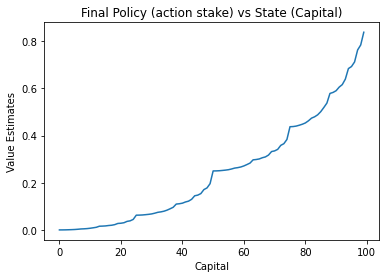

In [32]:
# Plotting Final Policy (action stake) vs State (Capital)

# x axis values
x = range(100)
# corresponding y axis values
y = v[:100]
 
# plotting the points 
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Value Estimates')
 
# giving a title to the graph
plt.title('Final Policy (action stake) vs State (Capital)')
 
# function to show the plot
plt.show()

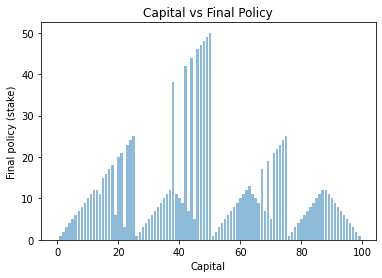

In [33]:
# Plotting Capital vs Final Policy

# x axis values
x = range(100)
# corresponding y axis values
y = policy
 
# plotting the bars
plt.bar(x, y, align='center', alpha=0.5)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Final policy (stake)')
 
# giving a title to the graph
plt.title('Capital vs Final Policy')
 
# function to show the plot
plt.show()
